# **Appendix**
The following R code and its corresponding output are designed to complement and support the analysis presented in part 3 of the project. These computational elements provide additional detail and validation for the findings discussed in that section.

**Install and import libraries:**

In [ ]:
install.packages(c("PerformanceAnalytics","dplyr","evd","rugarch","forecast","quantmod", "ismev", "evir","TSA","tseries","FinTS",'aTSA','lmtest' ))
library(quantmod)
library(ismev)
library(evir)
library(TSA)
library(tseries)
library(FinTS)
library(aTSA)
library(lmtest)
library(forecast)
library(PerformanceAnalytics)
library(evd)
library(rugarch)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘xts’, ‘quadprog’, ‘zoo’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘nloptr’, ‘RcppArmadillo’, ‘fracdiff’, ‘timeDate’, ‘urca’, ‘TTR’, ‘leaps’, ‘locfit’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:



**Download data on selected stocks and plot their price changes on line charts:**

Warning message:
“HPG.VN contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "HPG.VN"

Warning message:
“GSK.L contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "GSK.L"

Warning message:
“LLOY.L contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "LLOY.L"

Warning message:
“VOD.L contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "VOD.L"

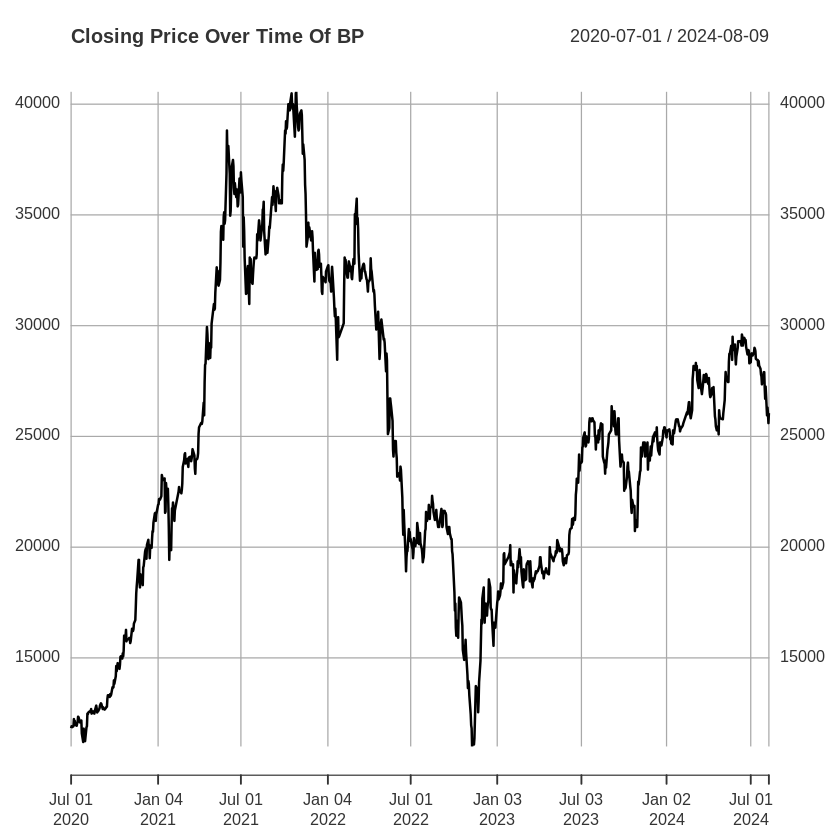

In [ ]:
#Download historical stock prices
getSymbols("HPG.VN", from = "2020-07-01", to = "2024-08-12")
getSymbols("GSK.L", from = "2020-07-01", to = "2024-07-01")
getSymbols("LLOY.L", from = "2020-07-01", to = "2024-07-01")
getSymbols("VOD.L", from = "2020-07-01", to = "2024-07-01")
#Plot data
plot(na.omit(Cl(HPG.VN)), type = "l",main = "Closing Price Over Time Of BP")

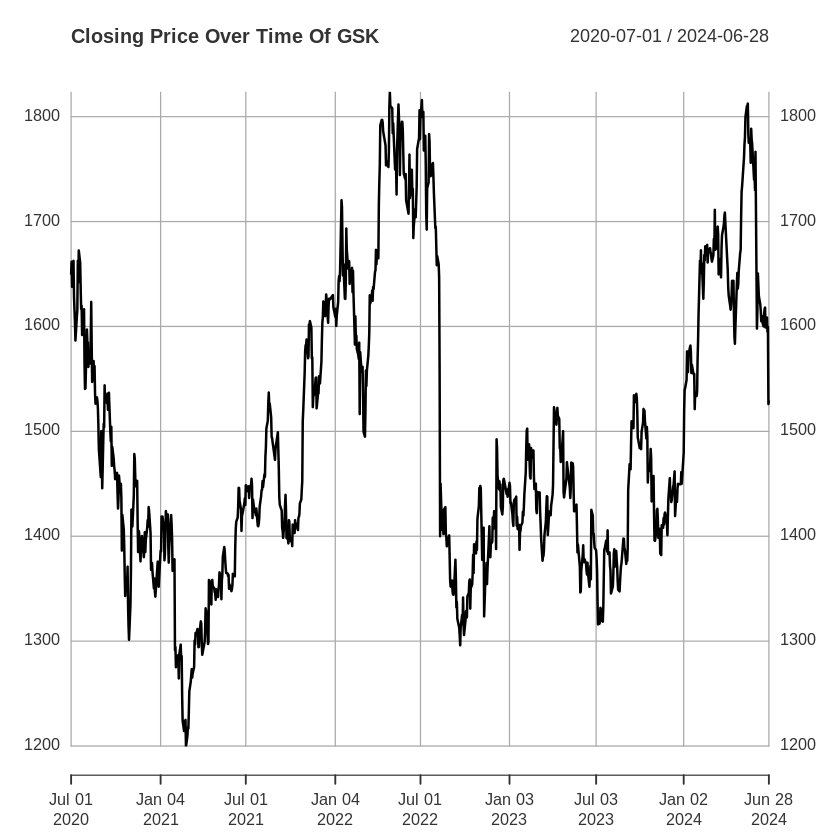

In [ ]:
plot(na.omit(Cl(GSK.L)), type = "l",main = "Closing Price Over Time Of GSK")

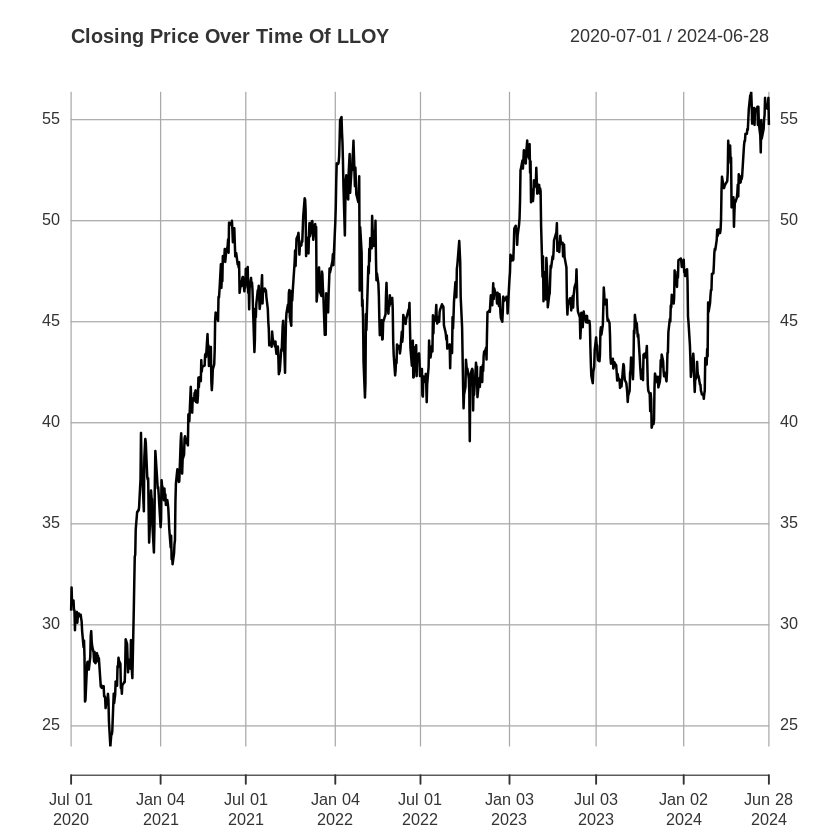

In [ ]:
plot(na.omit(Cl(LLOY.L)), type = "l",main = "Closing Price Over Time Of LLOY")

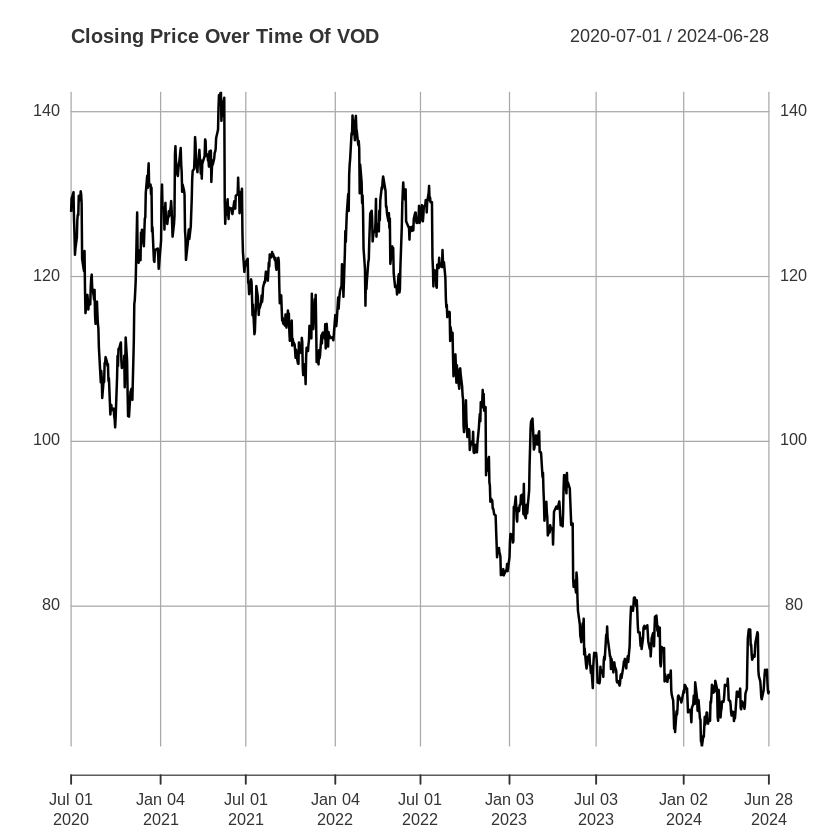

In [ ]:
plot(na.omit(Cl(VOD.L)), type = "l",main = "Closing Price Over Time Of VOD")

**Convert to log-return and plot them as graphs:**

In [ ]:
#Transform the data into log-return
r_HPG_day <- diff(log(HPG.VN$HPG.VN.Adjusted))
r_GSK_day <- diff(log(GSK.L$GSK.L.Adjusted))
r_LLOY_day <- diff(log(LLOY.L$LLOY.L.Adjusted))
r_VOD_day <- diff(log(VOD.L$VOD.L.Adjusted))
returns_BP <- na.omit(r_HPG_day)
returns_GSK <- na.omit(r_GSK_day)
returns_LLOY <- na.omit(r_LLOY_day)
returns_VOD <- na.omit(r_VOD_day)

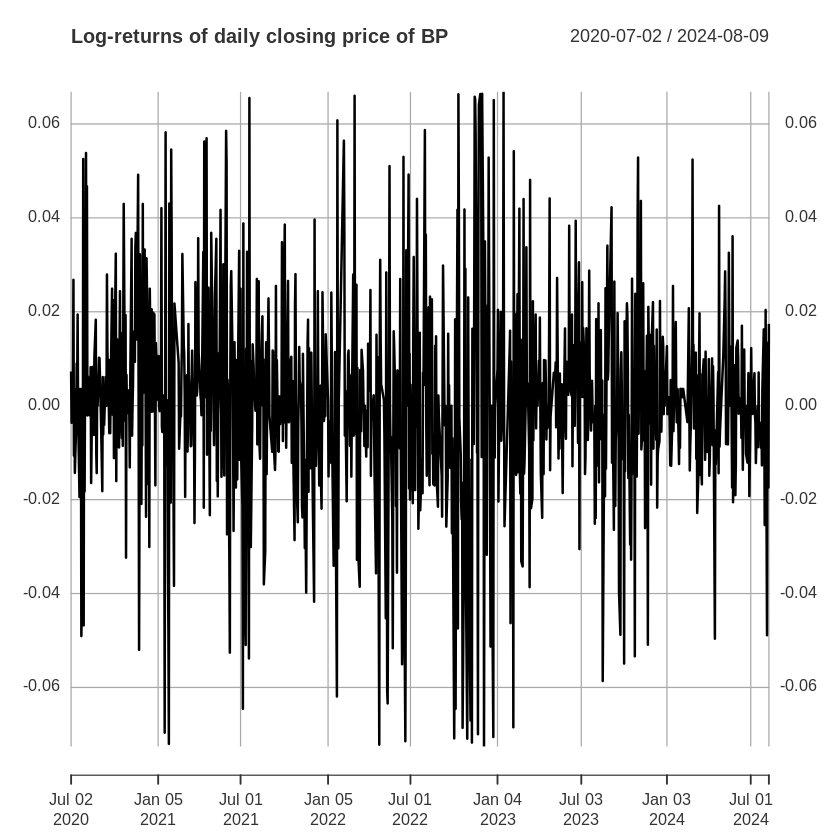

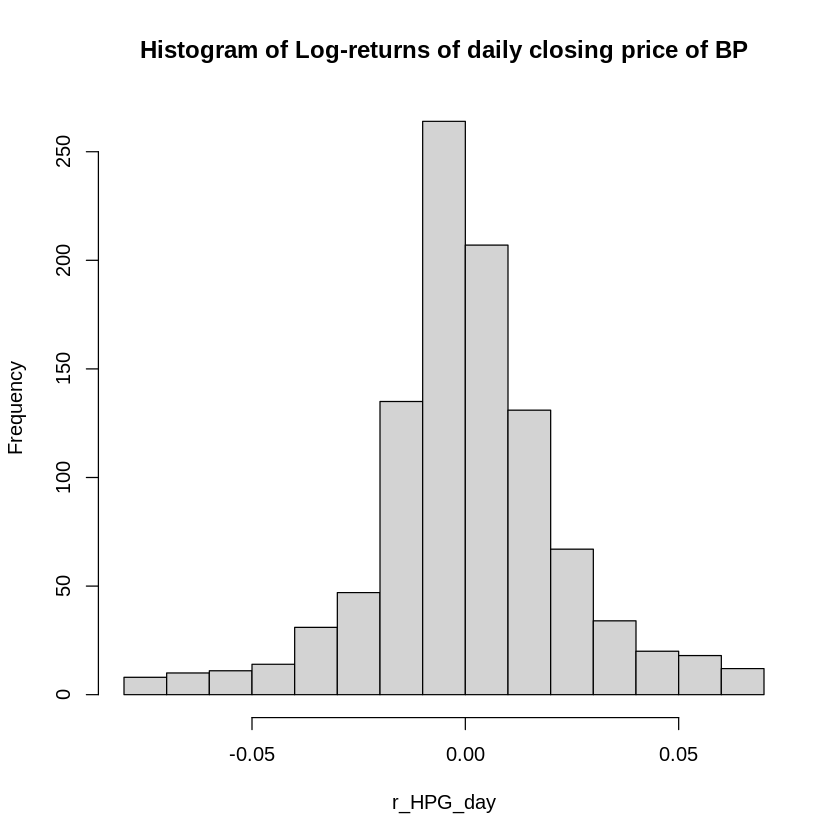

In [ ]:
#Plot log-return and distribution of log-return
#BP
plot(returns_BP,type='l',main = "Log-returns of daily closing price of BP")
hist(r_HPG_day, main = "Histogram of Log-returns of daily closing price of BP")

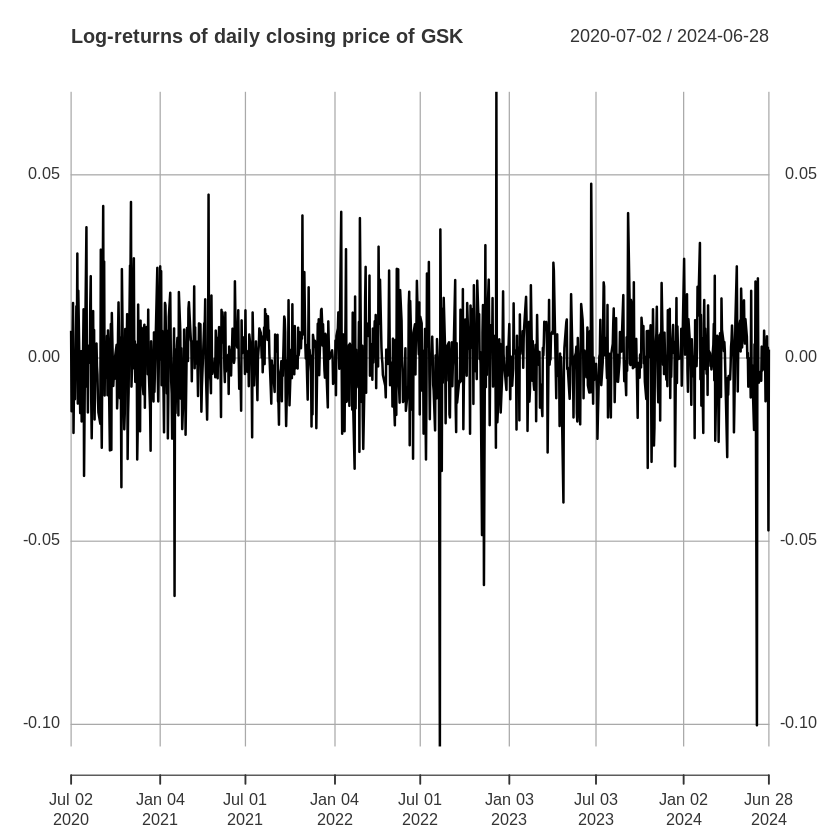

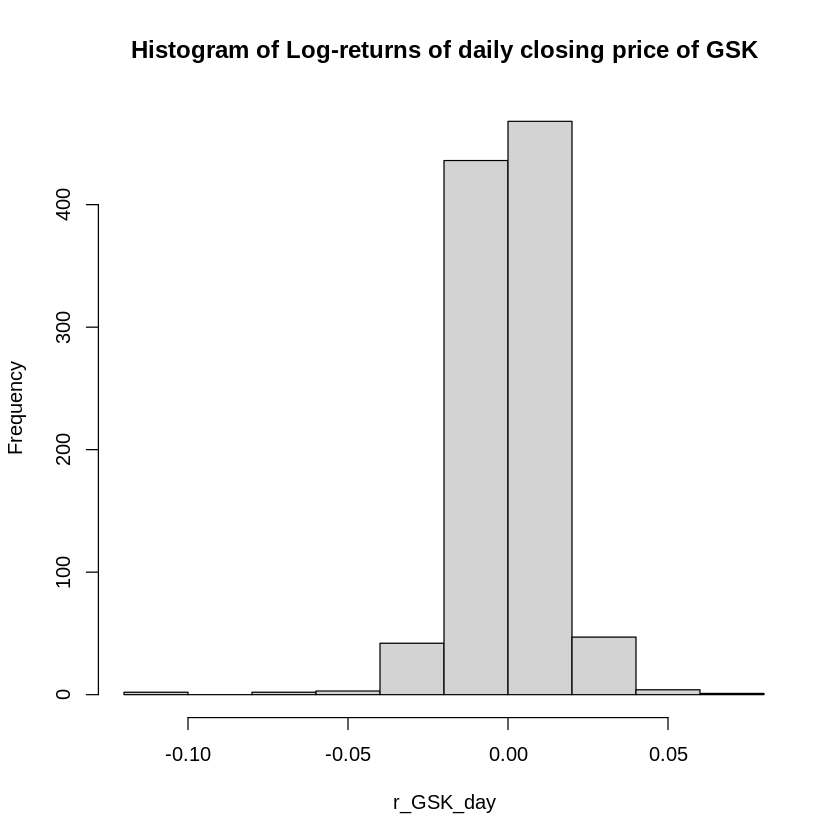

In [ ]:
#GSK
plot(returns_GSK,type='l',main = "Log-returns of daily closing price of GSK")
hist(r_GSK_day, main = "Histogram of Log-returns of daily closing price of GSK")

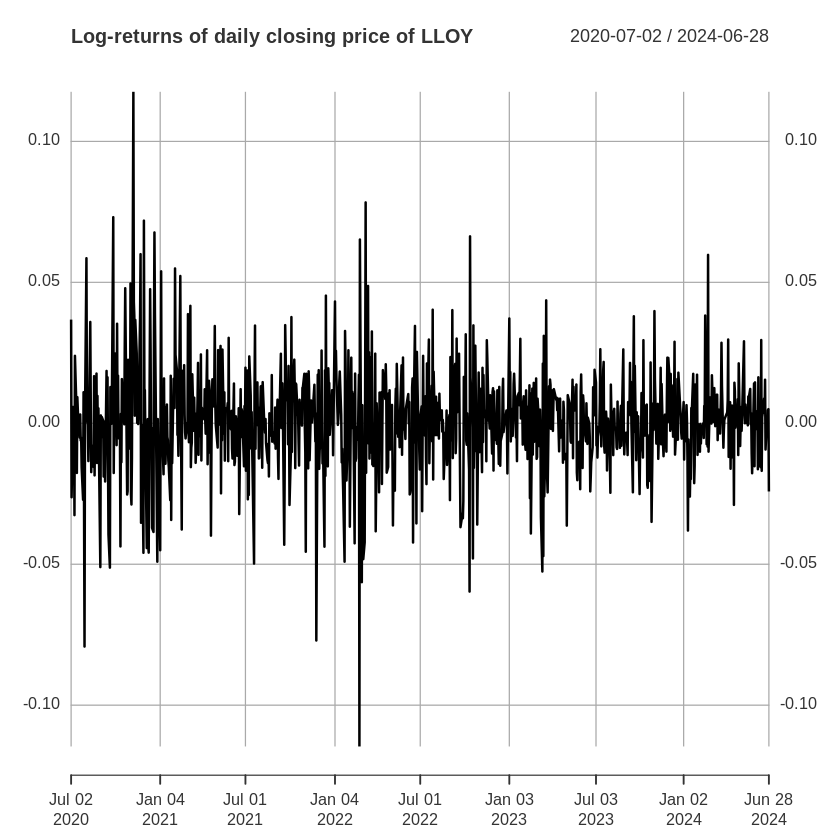

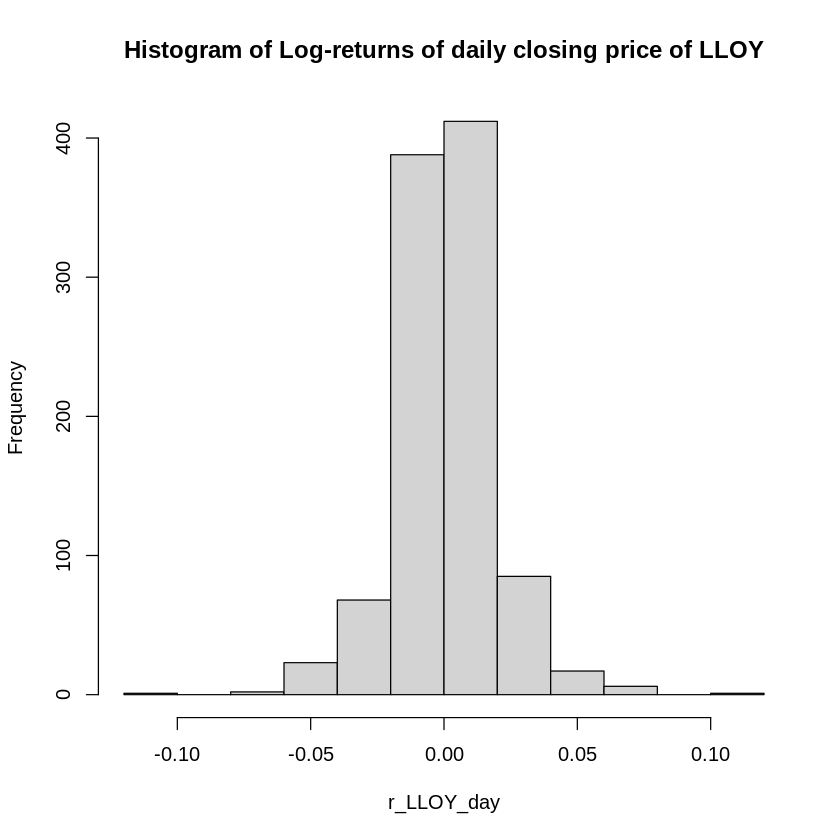

In [ ]:
#LLOY
plot(returns_LLOY,type='l',main = "Log-returns of daily closing price of LLOY")
hist(r_LLOY_day, main = "Histogram of Log-returns of daily closing price of LLOY")

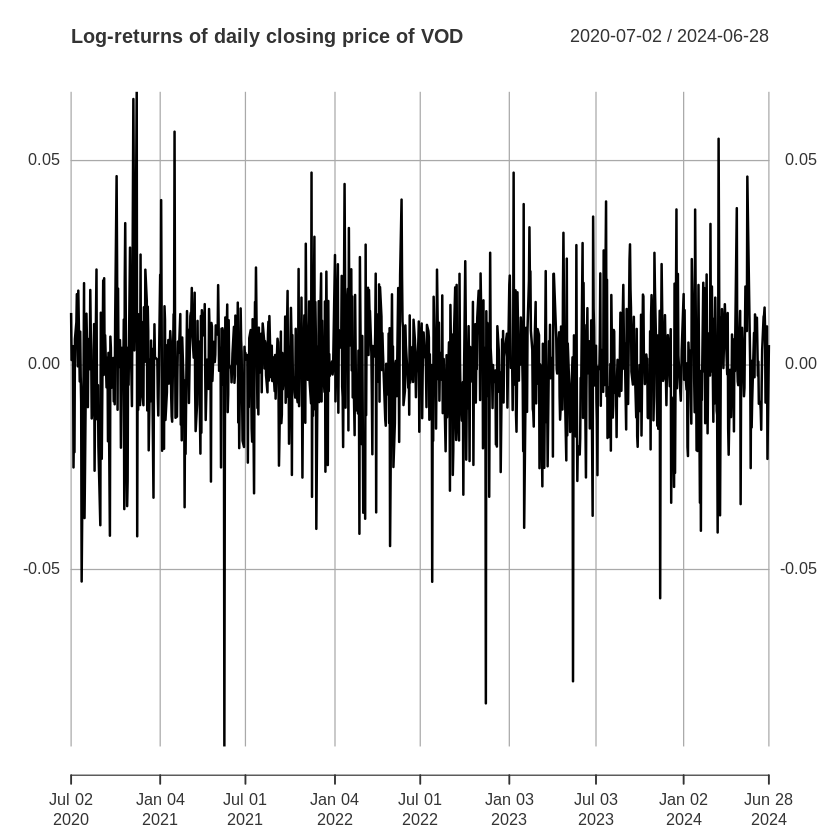

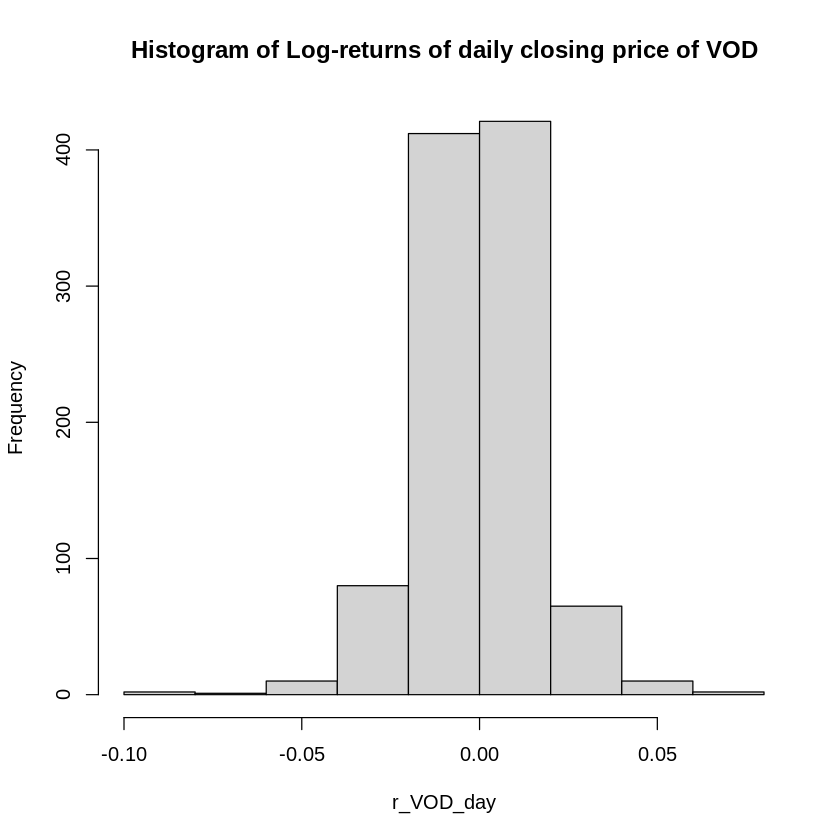

In [ ]:
#VOD
plot(returns_VOD,type='l',main = "Log-returns of daily closing price of VOD")
hist(r_VOD_day, main = "Histogram of Log-returns of daily closing price of VOD")

**Perform VaR estimation with different methods:**

In [ ]:
#VaR by Historical simulation
#Confidence level = 95%
VaR_BP_his_95 <- VaR(returns_BP,p =0.95,method = "historical")
VaR_GSK_his_95 <- VaR(returns_GSK,p=0.95,method = "historical")
VaR_LLOY_his_95 <- VaR(returns_LLOY,p = 0.95,method = "historical")
VaR_VOD_his_95 <- VaR(returns_VOD,p = 0.95,method = "historical")
#Print results
cat("Value at Risk (VaR) at 95% confidence level with historical simulation:\n")
cat("BP:", VaR_BP_his_95, "\n")
cat("GSK:", VaR_GSK_his_95, "\n")
cat("LLOY:", VaR_LLOY_his_95, "\n")
cat("VOD:", VaR_VOD_his_95, "\n")

Value at Risk (VaR) at 95% confidence level with historical simulation:
BP: -0.03639206 
GSK: -0.01986827 
LLOY: -0.02962504 
VOD: -0.02519161 


In [ ]:
#Confidence level = 99%
VaR_BP_his_99 <- VaR(returns_BP,p =0.99,method = "historical")
VaR_GSK_his_99 <- VaR(returns_GSK,p=0.99,method = "historical")
VaR_LLOY_his_99 <- VaR(returns_LLOY,p = 0.99,method = "historical")
VaR_VOD_his_99 <- VaR(returns_VOD,p = 0.99,method = "historical")
#Print results
cat("Value at Risk (VaR) at 99% confidence level with historical simulation:\n")
cat("BP:", VaR_BP_his_99, "\n")
cat("GSK:", VaR_GSK_his_99, "\n")
cat("LLOY:", VaR_LLOY_his_99, "\n")
cat("VOD:", VaR_VOD_his_99, "\n")

Value at Risk (VaR) at 99% confidence level with historical simulation:
BP: -0.06858932 
GSK: -0.03079065 
LLOY: -0.0490894 
VOD: -0.0409339 


In [ ]:
#VaR by variance - covariance approach
#Confidence level = 95%
VaR_BP_para_95 <- VaR(returns_BP,p =0.95,method = "gaussian")
VaR_GSK_para_95 <- VaR(returns_GSK,p=0.95,method = "gaussian")
VaR_LLOY_para_95 <- VaR(returns_LLOY,p = 0.95,method = "gaussian")
VaR_VOD_para_95 <- VaR(returns_VOD,p = 0.95,method = "gaussian")
#Print results
cat("Value at Risk (VaR) at 95% confidence level with variance - covariance approach:\n")
cat("BP:", VaR_BP_para_95, "\n")
cat("GSK:", VaR_GSK_para_95, "\n")
cat("LLOY:", VaR_LLOY_para_95, "\n")
cat("VOD:", VaR_VOD_para_95, "\n")

Value at Risk (VaR) at 95% confidence level with variance - covariance approach:
BP: -0.0361582 
GSK: -0.02183455 
LLOY: -0.03055822 
VOD: -0.02638669 


In [ ]:
#Confidence level = 99%
VaR_BP_para_99 <- VaR(returns_BP,p =0.99,method = "gaussian")
VaR_GSK_para_99 <- VaR(returns_GSK,p=0.99,method = "gaussian")
VaR_LLOY_para_99 <- VaR(returns_LLOY,p = 0.99,method = "gaussian")
VaR_VOD_para_99 <- VaR(returns_VOD,p = 0.99,method = "gaussian")
#Print results
cat("Value at Risk (VaR) at 99% confidence level with variance - covariance approach:\n")
cat("BP:", VaR_BP_para_99, "\n")
cat("GSK:", VaR_GSK_para_99, "\n")
cat("LLOY:", VaR_LLOY_para_99, "\n")
cat("VOD:", VaR_VOD_para_99, "\n")

Value at Risk (VaR) at 99% confidence level with variance - covariance approach:
BP: -0.05139352 
GSK: -0.03092802 
LLOY: -0.04354241 
VOD: -0.03723085 


In [ ]:
#VaR by Monte Carlo simulation
num_simulations <- 1000
#Simulate future returns
set.seed(789)  # For reproducibility
simulated_returns_BP_day <- replicate(num_simulations, {
  sum(rnorm(1, mean = mean(returns_BP, na.rm= TRUE), sd = sd(returns_BP, na.rm = TRUE)))
})
simulated_returns_GSK_day <- replicate(num_simulations, {
  sum(rnorm(1, mean = mean(returns_GSK,na.rm= TRUE), sd = sd(returns_GSK,na.rm= TRUE)))
})
simulated_returns_LLOY_day <- replicate(num_simulations, {
  sum(rnorm(1, mean = mean(returns_LLOY,na.rm= TRUE), sd = sd(returns_LLOY,na.rm= TRUE)))
})
simulated_returns_VOD_day <- replicate(num_simulations, {
  sum(rnorm(1, mean = mean(returns_VOD,na.rm= TRUE), sd = sd(returns_VOD,na.rm= TRUE)))
})
#Calculate the VaR
#Confidence level = 95%
VaR_BP_mc_95 <- quantile(simulated_returns_BP_day, probs = 1 - 0.95)
VaR_GSK_mc_95 <- quantile(simulated_returns_GSK_day, probs = 1 - 0.95)
VaR_LLOY_mc_95 <- quantile(simulated_returns_LLOY_day, probs = 1 - 0.95)
VaR_VOD_mc_95 <- quantile(simulated_returns_VOD_day, probs = 1 - 0.95)
#Print results
cat("Value at Risk (VaR) at 95% confidence level with monte carlo simulation:\n")
cat("BP:", VaR_BP_mc_95, "\n")
cat("GSK:", VaR_GSK_mc_95, "\n")
cat("LLOY:", VaR_LLOY_mc_95, "\n")
cat("VOD:", VaR_VOD_mc_95, "\n")

Value at Risk (VaR) at 95% confidence level with monte carlo simulation:
BP: -0.03649833 
GSK: -0.02116361 
LLOY: -0.02940131 
VOD: -0.02666218 


In [ ]:
#Confidence level = 99%
VaR_BP_mc_99 <- quantile(simulated_returns_BP_day, probs = 1 - 0.99)
VaR_GSK_mc_99 <- quantile(simulated_returns_GSK_day, probs = 1 - 0.99)
VaR_LLOY_mc_99 <- quantile(simulated_returns_LLOY_day, probs = 1 - 0.99)
VaR_VOD_mc_99 <- quantile(simulated_returns_VOD_day, probs = 1 - 0.99)
#Print results
cat("Value at Risk (VaR) at 99% confidence level with monte carlo simulation:\n")
cat("BP:", VaR_BP_mc_99, "\n")
cat("GSK:", VaR_GSK_mc_99, "\n")
cat("LLOY:", VaR_LLOY_mc_99, "\n")
cat("VOD:", VaR_VOD_mc_99, "\n")

Value at Risk (VaR) at 99% confidence level with monte carlo simulation:
BP: -0.0474881 
GSK: -0.02892252 
LLOY: -0.04296975 
VOD: -0.03719155 


In [ ]:
# EVT
# Block maxima gev test function
block_maxima_gev <- function(returns, block_size) {
  n_blocks <- floor(length(returns) / block_size)
  block_maxima <- sapply(1:n_blocks, function(i) max(returns[((i-1)*block_size + 1):(i*block_size)]))
  fit <- fgev(block_maxima, std.err = FALSE)
  return(fit)
}

# Example block sizes
block_sizes <- c(1,21, 63, 125, 252)

# Fit GEV for each block size for BP
fits <- lapply(block_sizes, function(bs) block_maxima_gev(returns_BP, bs))

extract_parameters_and_var <- function(fit, alpha = c(0.95, 0.99)) {
  params <- fit$estimate
  var_95 <- qgev(alpha[1], loc = params[1], scale = params[2], shape = params[3])
  var_99 <- qgev(alpha[2], loc = params[1], scale = params[2], shape = params[3])
  return(c(params, var_95, var_99))
}

results <- lapply(fits, extract_parameters_and_var)
results_df <- do.call(rbind, results)
colnames(results_df) <- c("Location (µ)", "Scale (σ)", "Shape (ξ)",
                          "VaR 95%", "VaR 99%")

# Add block sizes and number of blocks
results_df <- cbind("Block Size" = block_sizes, "Number of Blocks" = floor(length(returns_BP) / block_sizes), results_df)

print(results_df)


     Block Size Number of Blocks Location (µ)   Scale (σ)   Shape (ξ)
[1,]          1              993 -0.007944099 0.021797550 -0.14069040
[2,]         21               47  0.029367754 0.012675372  0.14726038
[3,]         63               15  0.042633113 0.018814970  0.09763537
[4,]        125                7  0.056130107 0.021913761  0.07801670
[5,]        252                3  0.064289928 0.007496463  1.16840926
        VaR 95%    VaR 99%
[1,] 0.04497433 0.06587962
[2,] 0.07659369 0.11275602
[3,] 0.10746388 0.15188994
[4,] 0.12937740 0.17739881
[5,] 0.26414514 1.44313655


In [ ]:
# GSK
fits <- lapply(block_sizes, function(bs) block_maxima_gev(returns_GSK, bs))

extract_parameters_and_var <- function(fit, alpha = c(0.95, 0.99)) {
  params <- fit$estimate
  var_95 <- qgev(alpha[1], loc = params[1], scale = params[2], shape = params[3])
  var_99 <- qgev(alpha[2], loc = params[1], scale = params[2], shape = params[3])
  return(c(params, var_95, var_99))
}

results <- lapply(fits, extract_parameters_and_var)
results_df <- do.call(rbind, results)
colnames(results_df) <- c("Location (µ)", "Scale (σ)", "Shape (ξ)",
                          "VaR 95%", "VaR 99%")

# Add block sizes and number of blocks
results_df <- cbind("Block Size" = block_sizes, "Number of Blocks" = floor(length(returns_GSK) / block_sizes), results_df)

print(results_df)

     Block Size Number of Blocks Location (µ)   Scale (σ)  Shape (ξ)    VaR 95%
[1,]          1             1005  -1.23024353 1.937907534 -1.4871698 0.05711484
[2,]         21               47   0.02052622 0.007524631  0.1651759 0.04937653
[3,]         63               15   0.03105489 0.011819683 -0.1054377 0.06119606
[4,]        125                8   0.03933312 0.007055035  0.1786968 0.06697859
[5,]        252                3   0.04139175 0.003062609  1.0007404 0.09812636
        VaR 99%
[1,] 0.07144791
[2,] 0.07236451
[3,] 0.07413767
[4,] 0.08967539
[5,] 0.34387184


In [ ]:
# LLOY
fits <- lapply(block_sizes, function(bs) block_maxima_gev(returns_LLOY, bs))

extract_parameters_and_var <- function(fit, alpha = c(0.95, 0.99)) {
  params <- fit$estimate
  var_95 <- qgev(alpha[1], loc = params[1], scale = params[2], shape = params[3])
  var_99 <- qgev(alpha[2], loc = params[1], scale = params[2], shape = params[3])
  return(c(params, var_95, var_99))
}

results <- lapply(fits, extract_parameters_and_var)
results_df <- do.call(rbind, results)
colnames(results_df) <- c("Location (µ)", "Scale (σ)", "Shape (ξ)",
                          "VaR 95%", "VaR 99%")

# Add block sizes and number of blocks
results_df <- cbind("Block Size" = block_sizes, "Number of Blocks" = floor(length(returns_LLOY) / block_sizes), results_df)

print(results_df)

     Block Size Number of Blocks Location (µ)  Scale (σ)   Shape (ξ)    VaR 95%
[1,]          1             1003 -0.007206498 0.02090762 -0.16310040 0.04201254
[2,]         21               47  0.028059868 0.01394819  0.12945237 0.07858037
[3,]         63               15  0.041002648 0.01624288  0.09460876 0.09670787
[4,]        125                8  0.049199955 0.01129042  0.55624552 0.13481961
[5,]        252                3  0.069255649 0.00551641  1.01178483 0.17388376
        VaR 99%
[1,] 0.06044743
[2,] 0.11575978
[3,] 0.13462139
[4,] 0.29115607
[5,] 0.63650951


In [ ]:
# VOD
fits <- lapply(block_sizes, function(bs) block_maxima_gev(returns_VOD, bs))

extract_parameters_and_var <- function(fit, alpha = c(0.95, 0.99)) {
  params <- fit$estimate
  var_95 <- qgev(alpha[1], loc = params[1], scale = params[2], shape = params[3])
  var_99 <- qgev(alpha[2], loc = params[1], scale = params[2], shape = params[3])
  return(c(params, var_95, var_99))
}

results <- lapply(fits, extract_parameters_and_var)
results_df <- do.call(rbind, results)
colnames(results_df) <- c("Location (µ)", "Scale (σ)", "Shape (ξ)",
                          "VaR 95%", "VaR 99%")

# Add block sizes and number of blocks
results_df <- cbind("Block Size" = block_sizes, "Number of Blocks" = floor(length(returns_VOD) / block_sizes), results_df)

print(results_df)

     Block Size Number of Blocks Location (µ)   Scale (σ)     Shape (ξ)
[1,]          1             1003 -0.006188878 0.017391073 -2.334033e-01
[2,]         21               47  0.024174249 0.010182985  2.078952e-08
[3,]         63               15  0.033967748 0.012554321 -1.836994e-01
[4,]        125                8  0.044736428 0.011639348 -3.833666e-01
[5,]        252                3  0.047612173 0.001387169  4.276640e-01
        VaR 95%    VaR 99%
[1,] 0.03107049 0.04285823
[2,] 0.05441970 0.07101750
[3,] 0.06270674 0.07295406
[4,] 0.06537444 0.06989236
[5,] 0.05592138 0.06756505


**Perform backtesting of VaR estimates using Kupiec's POF method:**

In [ ]:
# Backtesting
# Kupiec's POF test function
kupiec_test <- function(returns, var_estimate, confidence_level) {
  n <- length(returns)
  alpha = 1- confidence_level
  var_estimate <- rep(var_estimate, length(returns))
  n_fail <- sum(returns < var_estimate)
  x <- sum(n_fail)
  pof <- -2 * log((1 - alpha)^(n - x) * alpha^x) + 2 * log((1 - x/n)^(n - x) * (x/n)^x)
  p_value <- 1 - pchisq(pof, df = 1)
  return(list(LR_statistic = pof, p_value = p_value, failures = n_fail, expected_fail_rate = alpha * n ))
}


In [ ]:
#Confidence level = 95%
confidence_level <- 0.95
#BP
#Historical VaR
kupiec_hist_BP <- kupiec_test(returns_BP, VaR_BP_his_95, confidence_level)
#Variance-Covariance VaR
kupiec_para_BP <- kupiec_test(returns_BP, VaR_BP_para_95, confidence_level)
#Monte Carlo VaR
kupiec_mc_BP <- kupiec_test(returns_BP, VaR_BP_mc_95, confidence_level)
#Extreme value
kupiec_evt_BP_1 <- kupiec_test(returns_BP, -0.0449, confidence_level)
kupiec_evt_BP_21 <- kupiec_test(returns_BP, -0.0765, confidence_level)
kupiec_evt_BP_63 <- kupiec_test(returns_BP, -0.1074, confidence_level)
kupiec_evt_BP_125 <- kupiec_test(returns_BP, -0.1293, confidence_level)
kupiec_evt_BP_252 <- kupiec_test(returns_BP, -0.2641, confidence_level)

In [ ]:
#Historical method
#Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_BP_his_95), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_hist_BP$failures, "\n")
cat("Expected number of fails:",kupiec_hist_BP$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_BP$LR_statistic, "\n")
cat("p-value:", kupiec_hist_BP$p_value, "\n")

#Interpret results
if (kupiec_hist_BP$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03639206 
Number of observations: 1009 
Number of fails: 51 
Expected number of fails: 50.45 
LR statistic: 0.006290006 
p-value: 0.9367864 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
#Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_BP_para_95), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_para_BP$failures, "\n")
cat("Expected number of fails:",kupiec_para_BP$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_BP$LR_statistic, "\n")
cat("p-value:", kupiec_para_BP$p_value, "\n")

#Interpret results
if (kupiec_para_BP$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.0361582 
Number of observations: 1009 
Number of fails: 51 
Expected number of fails: 50.45 
LR statistic: 0.006290006 
p-value: 0.9367864 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Monte Carlo method
#Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_BP_mc_95), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_mc_BP$failures, "\n")
cat("Expected number of fails:",kupiec_mc_BP$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_BP$LR_statistic, "\n")
cat("p-value:", kupiec_mc_BP$p_value, "\n")

#Interpret results
if (kupiec_mc_BP$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03649833 
Number of observations: 1009 
Number of fails: 51 
Expected number of fails: 50.45 
LR statistic: 0.006290006 
p-value: 0.9367864 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#EVT method
#Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.0449), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_evt_BP_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_BP_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_BP_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_BP_1$p_value, "\n")

#Interpret results
if (kupiec_evt_BP_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.0449 
Number of observations: 993 
Number of fails: 19 
Expected number of fails: 49.65 
LR statistic: 25.78397 
p-value: 3.818475e-07 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# GSK
# Historical VaR
kupiec_hist_GSK <- kupiec_test(returns_GSK, VaR_GSK_his_95, confidence_level)
# Variance-Covariance VaR
kupiec_para_GSK <- kupiec_test(returns_GSK, VaR_GSK_para_95, confidence_level)
# Monte Carlo VaR
kupiec_mc_GSK <- kupiec_test(returns_GSK, VaR_GSK_mc_95, confidence_level)
# Extreme value
kupiec_evt_GSK_1 <- kupiec_test(returns_GSK, -0.0571, confidence_level)
kupiec_evt_GSK_21 <- kupiec_test(returns_GSK, -0.0493, confidence_level)
kupiec_evt_GSK_63 <- kupiec_test(returns_GSK, -0.0611, confidence_level)
kupiec_evt_GSK_125 <- kupiec_test(returns_GSK, -0.669, confidence_level)
kupiec_evt_GSK_252 <- kupiec_test(returns_GSK, -0.0981, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_GSK_his_95), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_hist_GSK$failures, "\n")
cat("Expected number of fails:",kupiec_hist_GSK$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_GSK$LR_statistic, "\n")
cat("p-value:", kupiec_hist_GSK$p_value, "\n")

# Interpret results
if (kupiec_hist_GSK$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.01986834 
Number of observations: 1005 
Number of fails: 51 
Expected number of fails: 50.25 
LR statistic: 0.01172806 
p-value: 0.9137607 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_GSK_para_95), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_para_GSK$failures, "\n")
cat("Expected number of fails:",kupiec_para_GSK$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_GSK$LR_statistic, "\n")
cat("p-value:", kupiec_para_GSK$p_value, "\n")

# Interpret results
if (kupiec_para_GSK$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02183456 
Number of observations: 1005 
Number of fails: 37 
Expected number of fails: 50.25 
LR statistic: 4.032183 
p-value: 0.04464013 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_GSK_mc_95), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_mc_GSK$failures, "\n")
cat("Expected number of fails:",kupiec_mc_GSK$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_GSK$LR_statistic, "\n")
cat("p-value:", kupiec_mc_GSK$p_value, "\n")

# Interpret results
if (kupiec_mc_GSK$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02116362 
Number of observations: 1005 
Number of fails: 38 
Expected number of fails: 50.25 
LR statistic: 3.420253 
p-value: 0.06440113 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.0571), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_evt_GSK_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_GSK_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_GSK_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_GSK_1$p_value, "\n")

# Interpret results
if (kupiec_evt_GSK_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.0571 
Number of observations: 1005 
Number of fails: 2 
Expected number of fails: 10.05 
LR statistic: 9.707255 
p-value: 0.00183542 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# LLOY
# Historical VaR
kupiec_hist_LLOY <- kupiec_test(returns_LLOY, VaR_LLOY_his_95, confidence_level)
# Variance-Covariance VaR
kupiec_para_LLOY <- kupiec_test(returns_LLOY, VaR_LLOY_para_95, confidence_level)
# Monte Carlo VaR
kupiec_mc_LLOY <- kupiec_test(returns_LLOY, VaR_LLOY_mc_95, confidence_level)
# Extreme value
kupiec_evt_LLOY_1 <- kupiec_test(returns_LLOY, -0.04201, confidence_level)
kupiec_evt_LLOY_21 <- kupiec_test(returns_LLOY, -0.0785, confidence_level)
kupiec_evt_LLOY_63 <- kupiec_test(returns_LLOY, -0.0967, confidence_level)
kupiec_evt_LLOY_125 <- kupiec_test(returns_LLOY, -0.1348, confidence_level)
kupiec_evt_LLOY_252 <- kupiec_test(returns_LLOY, -0.1738, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_LLOY_his_95), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_hist_LLOY$failures, "\n")
cat("Expected number of fails:",kupiec_hist_LLOY$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_LLOY$LR_statistic, "\n")
cat("p-value:", kupiec_hist_LLOY$p_value, "\n")

# Interpret results
if (kupiec_hist_LLOY$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02962517 
Number of observations: 1003 
Number of fails: 51 
Expected number of fails: 50.15 
LR statistic: 0.01508455 
p-value: 0.9022503 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_LLOY_para_95), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_para_LLOY$failures, "\n")
cat("Expected number of fails:",kupiec_para_LLOY$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_LLOY$LR_statistic, "\n")
cat("p-value:", kupiec_para_LLOY$p_value, "\n")

# Interpret results
if (kupiec_para_LLOY$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03055821 
Number of observations: 1003 
Number of fails: 50 
Expected number of fails: 50.15 
LR statistic: 0.0004727142 
p-value: 0.9826538 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_LLOY_mc_95), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_mc_LLOY$failures, "\n")
cat("Expected number of fails:",kupiec_mc_LLOY$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_LLOY$LR_statistic, "\n")
cat("p-value:", kupiec_mc_LLOY$p_value, "\n")

# Interpret results
if (kupiec_mc_LLOY$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02940131 
Number of observations: 1003 
Number of fails: 51 
Expected number of fails: 50.15 
LR statistic: 0.01508455 
p-value: 0.9022503 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.04201), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_evt_LLOY_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_LLOY_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_LLOY_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_LLOY_1$p_value, "\n")

# Interpret results
if (kupiec_evt_LLOY_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.04201 
Number of observations: 1003 
Number of fails: 26 
Expected number of fails: 50.15 
LR statistic: 14.74703 
p-value: 0.0001229408 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# VOD
# Historical VaR
kupiec_hist_VOD <- kupiec_test(returns_VOD, VaR_VOD_his_95, confidence_level)
# Variance-Covariance VaR
kupiec_para_VOD <- kupiec_test(returns_VOD, VaR_VOD_para_95, confidence_level)
# Monte Carlo VaR
kupiec_mc_VOD <- kupiec_test(returns_VOD, VaR_VOD_mc_95, confidence_level)
# Extreme value
kupiec_evt_VOD_1 <- kupiec_test(returns_VOD, -0.03107, confidence_level)
kupiec_evt_VOD_21 <- kupiec_test(returns_VOD, -0.0544, confidence_level)
kupiec_evt_VOD_63 <- kupiec_test(returns_VOD, -0.0627, confidence_level)
kupiec_evt_VOD_125 <- kupiec_test(returns_VOD, -0.0653, confidence_level)
kupiec_evt_VOD_252 <- kupiec_test(returns_VOD, -0.0559, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_VOD_his_95), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_hist_VOD$failures, "\n")
cat("Expected number of fails:",kupiec_hist_VOD$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_VOD$LR_statistic, "\n")
cat("p-value:", kupiec_hist_VOD$p_value, "\n")

# Interpret results
if (kupiec_hist_VOD$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02519161 
Number of observations: 1003 
Number of fails: 51 
Expected number of fails: 50.15 
LR statistic: 0.01508455 
p-value: 0.9022503 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_VOD_para_95), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_para_VOD$failures, "\n")
cat("Expected number of fails:",kupiec_para_VOD$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_VOD$LR_statistic, "\n")
cat("p-value:", kupiec_para_VOD$p_value, "\n")

# Interpret results
if (kupiec_para_VOD$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02638669 
Number of observations: 1003 
Number of fails: 43 
Expected number of fails: 50.15 
LR statistic: 1.125136 
p-value: 0.2888152 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_VOD_mc_95), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_mc_VOD$failures, "\n")
cat("Expected number of fails:",kupiec_mc_VOD$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_VOD$LR_statistic, "\n")
cat("p-value:", kupiec_mc_VOD$p_value, "\n")

# Interpret results
if (kupiec_mc_VOD$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02666219 
Number of observations: 1003 
Number of fails: 43 
Expected number of fails: 50.15 
LR statistic: 1.125136 
p-value: 0.2888152 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.03107), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_evt_VOD_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_VOD_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_VOD_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_VOD_1$p_value, "\n")

# Interpret results
if (kupiec_evt_VOD_21$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.03107 
Number of observations: 1003 
Number of fails: 32 
Expected number of fails: 50.15 
LR statistic: 7.889462 
p-value: 0.004972366 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
#Confidence level = 99%
confidence_level <- 0.99
# BP
# Historical VaR
kupiec_hist_BP <- kupiec_test(returns_BP, VaR_BP_his_99, confidence_level)
# Variance-Covariance VaR
kupiec_para_BP <- kupiec_test(returns_BP, VaR_BP_para_99, confidence_level)
# Monte Carlo VaR
kupiec_mc_BP <- kupiec_test(returns_BP, VaR_BP_mc_99, confidence_level)
# Extreme value
kupiec_evt_BP_1 <- kupiec_test(returns_BP, -0.0658, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_BP_his_99), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_hist_BP$failures, "\n")
cat("Expected number of fails:",kupiec_hist_BP$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_BP$LR_statistic, "\n")
cat("p-value:", kupiec_hist_BP$p_value, "\n")

# Interpret results
if (kupiec_hist_BP$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.05065189 
Number of observations: 993 
Number of fails: 10 
Expected number of fails: 9.93 
LR statistic: 0.0004972832 
p-value: 0.9822088 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_BP_para_99), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_para_BP$failures, "\n")
cat("Expected number of fails:",kupiec_para_BP$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_BP$LR_statistic, "\n")
cat("p-value:", kupiec_para_BP$p_value, "\n")

# Interpret results
if (kupiec_para_BP$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.04611104 
Number of observations: 993 
Number of fails: 18 
Expected number of fails: 9.93 
LR statistic: 5.339635 
p-value: 0.02084584 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_BP_mc_99), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_mc_BP$failures, "\n")
cat("Expected number of fails:",kupiec_mc_BP$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_BP$LR_statistic, "\n")
cat("p-value:", kupiec_mc_BP$p_value, "\n")

# Interpret results
if (kupiec_mc_BP$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.0474881 
Number of observations: 993 
Number of fails: 15 
Expected number of fails: 9.93 
LR statistic: 2.260884 
p-value: 0.1326783 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.0658), "\n")
cat("Number of observations:", length(returns_BP), "\n")
cat("Number of fails:", kupiec_evt_BP_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_BP_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_BP_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_BP_1$p_value, "\n")

# Interpret results
if (kupiec_evt_BP_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.0658 
Number of observations: 993 
Number of fails: 4 
Expected number of fails: 9.93 
LR statistic: 4.62157 
p-value: 0.03157233 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# GSK
# Historical VaR
kupiec_hist_GSK <- kupiec_test(returns_GSK, VaR_GSK_his_99, confidence_level)
# Variance-Covariance VaR
kupiec_para_GSK <- kupiec_test(returns_GSK, VaR_GSK_para_99, confidence_level)
# Monte Carlo VaR
kupiec_mc_GSK <- kupiec_test(returns_GSK, VaR_GSK_mc_99, confidence_level)
# Extreme value
kupiec_evt_GSK_1 <- kupiec_test(returns_GSK, -0.0714, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_GSK_his_99), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_hist_GSK$failures, "\n")
cat("Expected number of fails:",kupiec_hist_GSK$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_GSK$LR_statistic, "\n")
cat("p-value:", kupiec_hist_GSK$p_value, "\n")

# Interpret results
if (kupiec_hist_GSK$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03079083 
Number of observations: 1005 
Number of fails: 11 
Expected number of fails: 10.05 
LR statistic: 0.08800541 
p-value: 0.7667283 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_GSK_para_99), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_para_GSK$failures, "\n")
cat("Expected number of fails:",kupiec_para_GSK$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_GSK$LR_statistic, "\n")
cat("p-value:", kupiec_para_GSK$p_value, "\n")

# Interpret results
if (kupiec_para_GSK$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03092803 
Number of observations: 1005 
Number of fails: 10 
Expected number of fails: 10.05 
LR statistic: 0.0002516824 
p-value: 0.9873425 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_GSK_mc_99), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_mc_GSK$failures, "\n")
cat("Expected number of fails:",kupiec_mc_GSK$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_GSK$LR_statistic, "\n")
cat("p-value:", kupiec_mc_GSK$p_value, "\n")

# Interpret results
if (kupiec_mc_GSK$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.02892252 
Number of observations: 1005 
Number of fails: 14 
Expected number of fails: 10.05 
LR statistic: 1.397274 
p-value: 0.2371805 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.0714), "\n")
cat("Number of observations:", length(returns_GSK), "\n")
cat("Number of fails:", kupiec_evt_GSK_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_GSK_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_GSK_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_GSK_1$p_value, "\n")

# Interpret results
if (kupiec_evt_GSK_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.0714 
Number of observations: 1005 
Number of fails: 2 
Expected number of fails: 10.05 
LR statistic: 9.707255 
p-value: 0.00183542 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# LLOY
# Historical VaR
kupiec_hist_LLOY <- kupiec_test(returns_LLOY, VaR_LLOY_his_99, confidence_level)
# Variance-Covariance VaR
kupiec_para_LLOY <- kupiec_test(returns_LLOY, VaR_LLOY_para_99, confidence_level)
# Monte Carlo VaR
kupiec_mc_LLOY <- kupiec_test(returns_LLOY, VaR_LLOY_mc_99, confidence_level)
# Extreme value
kupiec_evt_LLOY_1 <- kupiec_test(returns_LLOY, -0.0604, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_LLOY_his_99), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_hist_LLOY$failures, "\n")
cat("Expected number of fails:",kupiec_hist_LLOY$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_LLOY$LR_statistic, "\n")
cat("p-value:", kupiec_hist_LLOY$p_value, "\n")

# Interpret results
if (kupiec_hist_LLOY$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.04908958 
Number of observations: 1003 
Number of fails: 11 
Expected number of fails: 10.03 
LR statistic: 0.09187063 
p-value: 0.7618124 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_LLOY_para_99), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_para_LLOY$failures, "\n")
cat("Expected number of fails:",kupiec_para_LLOY$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_LLOY$LR_statistic, "\n")
cat("p-value:", kupiec_para_LLOY$p_value, "\n")

# Interpret results
if (kupiec_para_LLOY$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.04354241 
Number of observations: 1003 
Number of fails: 21 
Expected number of fails: 10.03 
LR statistic: 9.217199 
p-value: 0.002397521 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_LLOY_mc_99), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_mc_LLOY$failures, "\n")
cat("Expected number of fails:",kupiec_mc_LLOY$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_LLOY$LR_statistic, "\n")
cat("p-value:", kupiec_mc_LLOY$p_value, "\n")

# Interpret results
if (kupiec_mc_LLOY$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.04296975 
Number of observations: 1003 
Number of fails: 23 
Expected number of fails: 10.03 
LR statistic: 12.40618 
p-value: 0.0004279152 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.0604), "\n")
cat("Number of observations:", length(returns_LLOY), "\n")
cat("Number of fails:", kupiec_evt_LLOY_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_LLOY_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_LLOY_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_LLOY_1$p_value, "\n")

# Interpret results
if (kupiec_evt_LLOY_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.0604 
Number of observations: 1003 
Number of fails: 3 
Expected number of fails: 10.03 
LR statistic: 6.867844 
p-value: 0.008776047 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# VOD
# Historical VaR
kupiec_hist_VOD <- kupiec_test(returns_VOD, VaR_VOD_his_99, confidence_level)
# Variance-Covariance VaR
kupiec_para_VOD <- kupiec_test(returns_VOD, VaR_VOD_para_99, confidence_level)
# Monte Carlo VaR
kupiec_mc_VOD <- kupiec_test(returns_VOD, VaR_VOD_mc_99, confidence_level)
# Extreme value
kupiec_evt_VOD_1 <- kupiec_test(returns_VOD, -0.0428, confidence_level)

In [ ]:
#Historical method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_VOD_his_99), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_hist_VOD$failures, "\n")
cat("Expected number of fails:",kupiec_hist_VOD$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_hist_VOD$LR_statistic, "\n")
cat("p-value:", kupiec_hist_VOD$p_value, "\n")

# Interpret results
if (kupiec_hist_VOD$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.0409339 
Number of observations: 1003 
Number of fails: 11 
Expected number of fails: 10.03 
LR statistic: 0.09187063 
p-value: 0.7618124 
Fail to reject H0: The VaR model is accurate at 5% significance level.


In [ ]:
#Parametric method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_VOD_para_99), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_para_VOD$failures, "\n")
cat("Expected number of fails:",kupiec_para_VOD$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_para_VOD$LR_statistic, "\n")
cat("p-value:", kupiec_para_VOD$p_value, "\n")

# Interpret results
if (kupiec_para_VOD$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03723086 
Number of observations: 1003 
Number of fails: 17 
Expected number of fails: 10.03 
LR statistic: 4.048553 
p-value: 0.04420923 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# Monte Carlo method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(VaR_VOD_mc_99), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_mc_VOD$failures, "\n")
cat("Expected number of fails:",kupiec_mc_VOD$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_mc_VOD$LR_statistic, "\n")
cat("p-value:", kupiec_mc_VOD$p_value, "\n")

# Interpret results
if (kupiec_mc_VOD$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: -0.03719155 
Number of observations: 1003 
Number of fails: 17 
Expected number of fails: 10.03 
LR statistic: 4.048553 
p-value: 0.04420923 
Reject H0: The VaR model is not accurate at 5% significance level.


In [ ]:
# EVT method
# Print results
cat("Kupiec's POF Test Results:\n")
cat("VaR value:", as.numeric(0.0428), "\n")
cat("Number of observations:", length(returns_VOD), "\n")
cat("Number of fails:", kupiec_evt_VOD_1$failures, "\n")
cat("Expected number of fails:",kupiec_evt_VOD_1$expected_fail_rate, "\n")
cat("LR statistic:", kupiec_evt_VOD_1$LR_statistic, "\n")
cat("p-value:", kupiec_evt_VOD_1$p_value, "\n")

# Interpret results
if (kupiec_evt_VOD_1$p_value < 0.05) {
  cat("Reject H0: The VaR model is not accurate at 5% significance level.\n")
} else {
  cat("Fail to reject H0: The VaR model is accurate at 5% significance level.\n")
}

Kupiec's POF Test Results:
VaR value: 0.0428 
Number of observations: 1003 
Number of fails: 7 
Expected number of fails: 10.03 
LR statistic: 1.03385 
p-value: 0.3092561 
Fail to reject H0: The VaR model is accurate at 5% significance level.
